In [23]:
#Import relevant packages and functions 
import os
import pandas as pd
%matplotlib inline

In [24]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi.newsapi_client import NewsApiClient
from datetime import date, datetime, timedelta

from nltk.corpus import stopwords, reuters
from nltk.stem import WordNetLemmatizer


lemmatizer = WordNetLemmatizer()

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [3]:
# Read your api key environment variable


In [25]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=os.environ["NEWS_API_KEY"])

In [26]:
# Fetch all the news about Bitcoin
bitcoin_headlines = newsapi.get_everything(
    q="Bitcoin",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# Print total articles
print(f"Total articles about Bitcoin: {bitcoin_headlines['totalResults']}")

# Show sample article
bitcoin_headlines["articles"][0]

Total articles about Bitcoin: 4341


{'source': {'id': 'wired', 'name': 'Wired'},
 'author': 'Laura Mallonee',
 'title': 'Inside the Icelandic Facility Where Bitcoin Is Mined',
 'description': "Cryptocurrency mining now uses more of the Nordic island nation's electricity than its homes.",
 'url': 'https://www.wired.com/story/iceland-bitcoin-mining-gallery/',
 'urlToImage': 'https://media.wired.com/photos/5dbc37a4c955950008b26751/191:100/w_1280,c_limit/photo_barnard_explosions_4.jpg',
 'publishedAt': '2019-11-03T15:00:00Z',
 'content': 'Less than two miles from Icelands Reykjavik airport sits a nondescript metal building as monolithic and drab as a commercial poultry barn. Theres a deafening racket inside, too, but it doesnt come from clucking chickens. Instead, tens of thousands of whirring… [+3426 chars]'}

In [27]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.tail(5)

,date,text,compound,positive,negative,neutral
93,2019-10-23,Bitcoin prices have quietly been in meltdown m...,0.0000,0.000,0.000,1.000
94,2019-11-13,Illustration by Stephen Shankland/CNET\r\nAfte...,0.1531,0.051,0.037,0.911
95,2019-10-30,After seeing its IPO dreams slashed earlier th...,0.2023,0.067,0.047,0.887
96,2019-10-31,"I hate to be the bearer of bad news, but victi...",-0.7140,0.080,0.184,0.736
97,2019-11-19,Graphic by Pixabay/Illustration by CNET\r\nWit...,0.8481,0.212,0.000,0.788


In [28]:
# Create the ethereum sentiment scores DataFrame
ethereum_headlines = newsapi.get_everything(
    q="ethereum",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# Print total articles
print(f"Total articles about ethereum: {ethereum_headlines['totalResults']}")

# Show sample article
ethereum_headlines["articles"][0]

# Create the Bitcoin sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()



Total articles about ethereum: 936


,date,text,compound,positive,negative,neutral
0,2019-11-20,Sharding and scalability. Transactions per sec...,0.3595,0.055,0.000,0.945
1,2019-10-20,TL;DR: The in-depth Complete Blockchain and Et...,0.4404,0.059,0.000,0.941
2,2019-10-24,Disrupt Berlin is right around the corner. And...,0.6249,0.100,0.000,0.900
3,2019-10-23,"he plaBy now, you should almost certainly know...",0.4601,0.085,0.000,0.915
4,2019-11-01,Blockchain has been picking up the pace since ...,-0.3089,0.000,0.055,0.945


In [29]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,98.000000,98.000000,98.000000,98.000000
mean,0.150929,0.062245,0.040418,0.897357
std,0.438114,0.052702,0.054981,0.075179
min,-0.831600,0.000000,0.000000,0.640000
25%,-0.096325,0.000000,0.000000,0.854000
50%,0.202300,0.066000,0.000000,0.926000
75%,0.507000,0.087750,0.068750,0.944000
max,0.914100,0.249000,0.271000,1.000000


In [30]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,96.000000,96.000000,96.000000,96.000000
mean,0.177229,0.056198,0.026906,0.916885
std,0.405316,0.053464,0.048792,0.070818
min,-0.877900,0.000000,0.000000,0.551000
25%,0.000000,0.000000,0.000000,0.892500
50%,0.273000,0.057000,0.000000,0.930000
75%,0.481000,0.098000,0.045250,0.954250
max,0.757900,0.239000,0.287000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [31]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [13]:
# Expand the default stopwords list if necessary

In [32]:
# Complete the tokenizer function
def tokenizer(doc):
    # Create a list of the words
    # Convert the words to lowercase
    # Remove the punctuation
    # Remove the stop words
    # Lemmatize Words into root words
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return ', '.join(output)
#input_text = tokenizer(doc)
#input_text

In [33]:
# Create a new tokens column for bitcoin
bitcoin_tokens = []
for i in range (0,100):
    try:
        doc=bitcoin_headlines["articles"][i]
        doc=doc['content']
        if pd.isna(doc):
            print('Empty') 
        else:        
            tokens = tokenizer(doc)
            bitcoin_tokens.append({"token": tokens })
    except AttributeError:
        pass

# Create DataFrame
bitcoin_df_tokens = pd.DataFrame(bitcoin_tokens)                    
bitcoin_df_comb=pd.concat([bitcoin_df, bitcoin_df_tokens],axis="columns", join="inner")

# Reorder DataFrame columns
cols = ["date", "compound", "positive", "negative", "neutral", "text", "token"]
bitcoin_df_comb = bitcoin_df_comb[cols]

bitcoin_df_comb.head()


Empty
Empty


,date,compound,positive,negative,neutral,text,token
0,2019-11-03,-0.1531,0.000,0.039,0.961,Less than two miles from Icelands Reykjavik ai...,"less, two, mile, icelands, reykjavik, airport,..."
1,2019-11-20,0.2999,0.104,0.100,0.796,"Whether Bitcoin, an immaterial resource derive...","whether, bitcoin, immaterial, resource, derive..."
2,2019-11-01,0.0000,0.000,0.000,1.000,High school students in France may be among th...,"high, school, student, france, may, among, fir..."
3,2019-10-20,0.4404,0.059,0.000,0.941,TL;DR: The in-depth Complete Blockchain and Et...,"tldr, indepth, complete, blockchain, ethereum,..."
4,2019-10-27,0.5070,0.069,0.000,0.931,Our robot colleague Satoshi Nakaboto writes ab...,"robot, colleague, satoshi, nakaboto, writes, b..."


In [34]:
# Create a new tokens column for ethereum
ethereum_tokens = []
for i in range (0,100):
    try:
        doc=ethereum_headlines["articles"][i]
        doc=doc['content']
        if pd.isna(doc):
            print('Empty') 
        else:        
            tokens = tokenizer(doc)
            ethereum_tokens.append({"token": tokens })
    except AttributeError:
        pass

# Create DataFrame
ethereum_df_tokens = pd.DataFrame(ethereum_tokens)                    
ethereum_df_comb=pd.concat([ethereum_df, ethereum_df_tokens],axis="columns", join="inner")

# Reorder DataFrame columns
cols = ["date", "compound", "positive", "negative", "neutral", "text", "token"]
ethereum_df_comb = ethereum_df_comb[cols]

ethereum_df_comb.head()

Empty
Empty
Empty
Empty


,date,compound,positive,negative,neutral,text,token
0,2019-11-20,0.3595,0.055,0.000,0.945,Sharding and scalability. Transactions per sec...,"sharding, scalability, transactions, per, seco..."
1,2019-10-20,0.4404,0.059,0.000,0.941,TL;DR: The in-depth Complete Blockchain and Et...,"tldr, indepth, complete, blockchain, ethereum,..."
2,2019-10-24,0.6249,0.100,0.000,0.900,Disrupt Berlin is right around the corner. And...,"disrupt, berlin, right, around, corner, plenty..."
3,2019-10-23,0.4601,0.085,0.000,0.915,"he plaBy now, you should almost certainly know...","plaby, almost, certainly, know, ethereum, eth,..."
4,2019-11-01,-0.3089,0.000,0.055,0.945,Blockchain has been picking up the pace since ...,"blockchain, ha, picking, pace, since, inceptio..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [35]:
from collections import Counter
from nltk import ngrams
from nltk import bigrams

import nltk
from nltk.util import ngrams
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures


processed_ethereum = [ sub['token'] for sub in ethereum_tokens ] 
processed_bitcoin  = [ sub['token'] for sub in bitcoin_tokens ] 


In [38]:
def tokenizer_clean(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return ' '.join(output)


In [39]:
# Generate the Bitcoin N-grams where N=2
#Works 
processed3 = "bitcoin "
for i in range (0,95):
    tokensbc=tokenizer_clean(processed_bitcoin[i])
    #print(tokens)
    processed3= processed3 + tokensbc
type(processed3)

n = 2
bigramsbc = ngrams(processed3.split(), n)

gramsall=[]
for grams in bigramsbc:
    #print(grams)
    gramsall.append(grams)
    
word_fd = nltk.FreqDist(gramsall)
word_fd

FreqDist({('satoshi', 'nakaboto'): 38, ('bitcoin', 'btc'): 24, ('charrobot', 'colleague'): 19, ('colleague', 'satoshi'): 19, ('nakaboto', 'writes'): 19, ('writes', 'bitcoin'): 19, ('every', 'fucking'): 19, ('fucking', 'daywelcome'): 19, ('daywelcome', 'another'): 19, ('another', 'edition'): 19, ...})

In [40]:
# Generate the Ethereum N-grams where N=2
#Works 
processed2 = "ethereum "
for i in range (0,95):
    tokens=tokenizer_clean(processed_ethereum[i])
    #print(tokens)
    processed2= processed2 + tokens
type(processed2)

n = 2
bigrams = ngrams(processed2.split(), n)

gramsall_et=[]
for grams in bigrams:
    #print(grams)
    gramsall_et.append(grams)
    
word_fd_eth = nltk.FreqDist(gramsall_et)
word_fd_eth

FreqDist({('early', 'morning'): 11, ('ethereum', 'ended'): 10, ('saw', 'ethereum'): 9, ('morning', 'intraday'): 9, ('ended', 'day'): 9, ('start', 'day'): 8, ('day', 'saw'): 8, ('intraday', 'high'): 7, ('price', 'action'): 5, ('charethereumethereum', 'fell'): 5, ...})

In [44]:
##most common word for Bitcoin 
#Works 
n = 1
bigramsbc = ngrams(processed3.split(), n)

gramsall1=[]
for grams in bigramsbc:
    #print(grams)
    gramsall1.append(grams)
    
most_bc = nltk.FreqDist(gramsall1)
most_bc

FreqDist({('bitcoin',): 95, ('satoshi',): 41, ('nakaboto',): 38, ('cryptocurrency',): 31, ('btc',): 27, ('ha',): 27, ('past',): 22, ('say',): 22, ('another',): 21, ('today',): 21, ...})

In [43]:
##most 10 common word for Ethereum 
n = 1
bigrams = ngrams(processed2.split(), n)

gramsall_et1=[]
for grams in bigrams:
    #print(grams)
    gramsall_et1.append(grams)
    
most_eth = nltk.FreqDist(gramsall_et1)
most_eth

# Use the token_count function to generate the top 10 words from each coin
#def token_count(tokens, N=10):
#    """Returns the top N tokens from the frequency count"""
#    return Counter(tokens).most_common(N)

FreqDist({('ethereum',): 64, ('ha',): 30, ('blockchain',): 24, ('day',): 24, ('cryptocurrency',): 20, ('bitcoin',): 18, ('morning',): 16, ('price',): 14, ('week',): 12, ('early',): 12, ...})

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [45]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

Text(0.5, 1.0, 'Bitcoin word cloud')

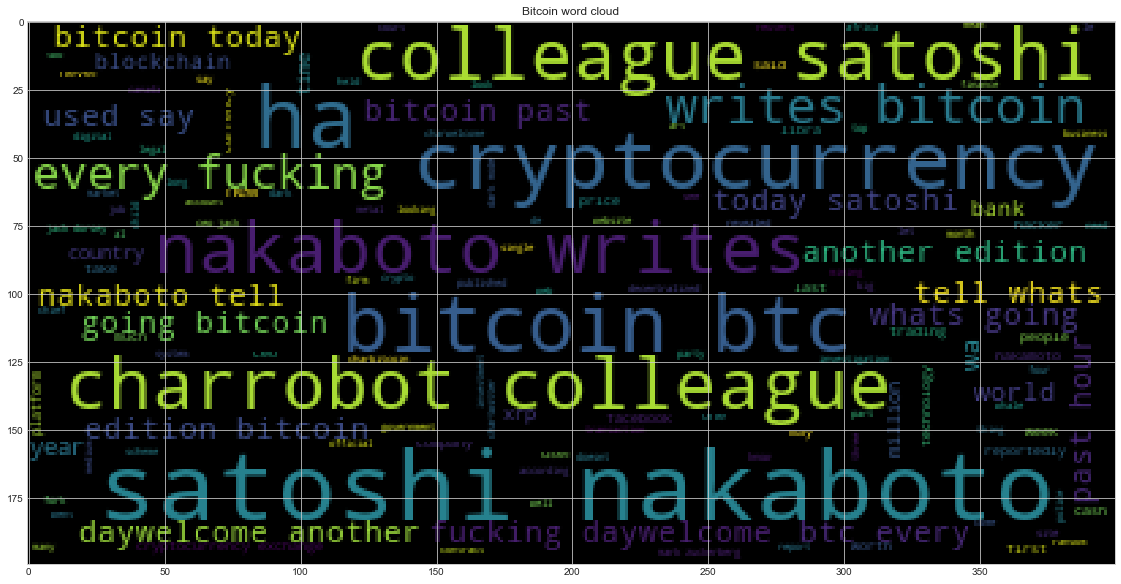

In [56]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(processed3)
plt.imshow(wc)
plt.title('Bitcoin word cloud')

Text(0.5, 1.0, 'Ethereum word cloud')

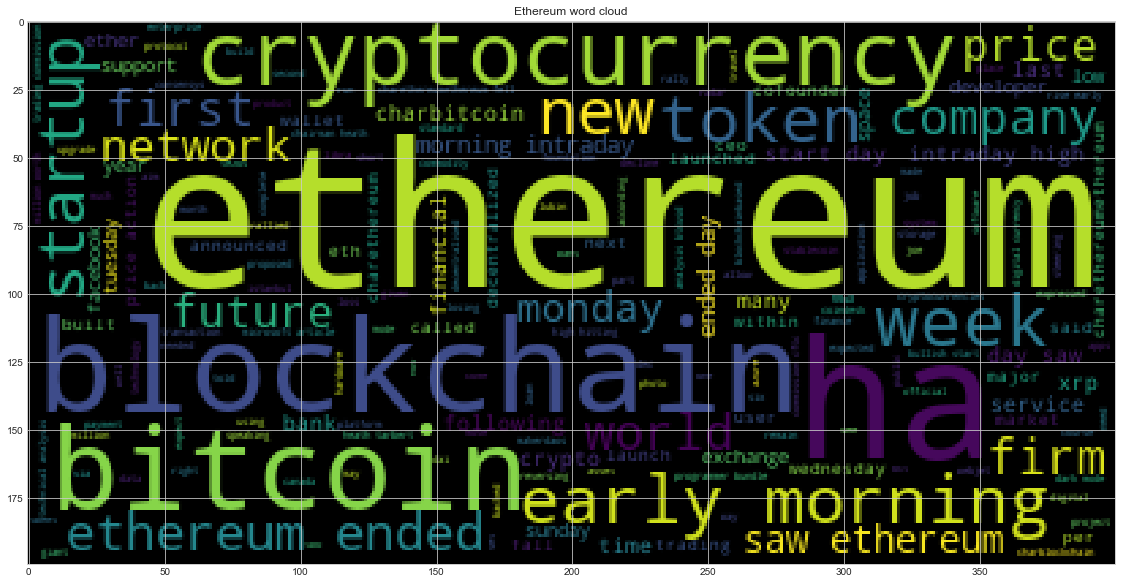

In [55]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(processed2)
plt.imshow(wc)
plt.title('Ethereum word cloud')

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [57]:
import spacy
from spacy import displacy

In [28]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [58]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [110]:
# Concatenate all of the bitcoin text together
bitcoin_text = []
for i in range (0,100):
    try:
        doc=bitcoin_headlines["articles"][i]
        doc=doc['content']
        if pd.isna(doc):
            print('Empty') 
        else:        
            bitcoin_text.append(doc)
            
    except AttributeError:
        pass
    
bitcoin_text= ', '.join(bitcoin_text)
regex = re.compile("[^a-zA-Z ]")
re_clean = regex.sub('', bitcoin_text)

Empty
Empty


In [111]:
# Run the NER processor on all of the text
NER_bit = nlp(re_clean)
NER_bit.user_data["title"] = "Bitcoin"
# Add a title to the document

In [112]:
# Render the visualization
displacy.render(NER_bit, style='ent')

In [113]:
# List all Entities
#print([ent.text for ent in NER_bit.ents if ent.label_ == 'GPE'])
print([ent.text for ent in NER_bit.ents])

['Less than two miles', 'Reykjavik airport', 'tens of thousands', 'Abkhazia', 'France', 'first', 'The Next Web', 'French', 'Le Ministre de lducation Nationale', 'Complete Blockchain and Ethereum Programmer', 'Bitcoin', 'Cryptocurrency', 'Satoshi Nakaboto', 'Bitcoin', 'Bitcoin', 'Today', 'Bitcoin', 'the past  hours', 'Satoshi Nakaboto', 'Bitcoin BTC', 'Bitcoin', 'Today', 'Bitcoin', 'the past  hours', 'Machiavelli', 'Satoshi Nakaboto', 'Bitcoin BTC', 'Bitcoin', 'Today', 'Bitcoin', 'the past  hours', 'Nietzsche', 'Time', 'Satoshi Nakaboto', 'Bitcoin BTC', 'Bitcoin', 'Today', 'Bitcoin', 'the past  hours', 'Isaac Newton', 'Square', 'Jack Dorsey', 'Bitcoin', 'Ghana', 'just weeks', 'Bitcoin', 'Africa', 'Nigeria', 'GhanaMini', 'G  ', 'Satoshi Nakaboto', 'Bitcoin BTC', 'Bitcoin', 'Today', 'Bitcoin', 'the past  hours', 'Hegel', 'Satoshi Nakaboto', 'Bitcoin BTC', 'Bitcoin', 'Today', 'Bitcoin', 'the past  hours', 'Satoshi Nakaboto', 'Bitcoin BTC', 'Bitcoin', 'Today', 'Bitcoin', 'the past  hours', 

---

## Ethereum NER

In [119]:
# Concatenate all of the bitcoin text together
ethereum_text = []
for i in range (0,100):
    try:
        doc=ethereum_headlines["articles"][i]
        doc=doc['content']
        if pd.isna(doc):
            print('Empty') 
        else:        
            ethereum_text.append(doc)
            
    except AttributeError:
        pass
    
ethereum_text= ', '.join(ethereum_text)
regex = re.compile("[^a-zA-Z ]")
re_clean_eth = regex.sub('', ethereum_text)


Empty
Empty
Empty
Empty


In [120]:
# Run the NER processor on all of the text
NER_ethe = nlp(re_clean_eth)
NER_ethe.user_data["title"] = "Ethereum"
# Add a title to the document


In [121]:
# Render the visualization
displacy.render(NER_ethe, style='ent')

In [122]:
# List all Entities
print([ent.text for ent in NER_ethe.ents])

['its year', 'Bitcoin', 'Cryptocurrency', 'Berlin', 'December', 'December', 'second', 'the year', 'Santoshi Nakamoto Nakamoto', 'Blockchai', 'ReutersulliBitcoin', 'Wednesday', 'June', 'Facebook', 'Mark Zuckerbergs', 'LibraliliZuckerberg', 'Swiss', 'countrys', 'Swissbased', 'Block', 'Ripple XRP', 'Ponzi', 'XRP', 'Londonbased', 'Elliptic', 'less than  percent', 'XRP', 'The Royal Bank of Canada', 'platformLast week', 'Canadian', 'The Royal Bank of Canada RBC', 'Opera', 'the day', 'six', 'Bitcoin', 'XRP', 'third', 'Bitcoin', 'the Complete Blockchain and Ethereum Programmer Bundle', 'Bejingbased', 'Hyperbola', 'first', 'last week', 'Chinese', 'first', 'last year', 'Chinese', 'November', 'British Columbia', 'Canada', 'the Starship Blockchain', 'its year', 'morning', 'May', 'San Francisco', 'Montgomery Street', 'Wells FargoI', 'two', 'The Complete Blockchain amp Ethereum Programmer Bundle', 'ten', 'eLearning', 'Ethereum', 'November', 'first', 'Bitcoin', 'Bitcoin', 'Ethereum', 'Libra', 'Everco